   VendorName  ModelName   MYCT    MMIN     MMAX   CACH  CHMIN  CHMAX    PRP  \
0  VendorName  ModelName    NaN     NaN      NaN    NaN    NaN    NaN    NaN   
1     adviser      32/60  125.0   256.0   6000.0  256.0   16.0  128.0  198.0   
2      amdahl     470v/7   29.0  8000.0  32000.0   32.0    8.0   32.0  269.0   
3      amdahl    470v/7a   29.0  8000.0  32000.0   32.0    8.0   32.0  220.0   
4      amdahl    470v/7b   29.0  8000.0  32000.0   32.0    8.0   32.0  172.0   

     ERP  
0    NaN  
1  199.0  
2  253.0  
3  253.0  
4  253.0  
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     1

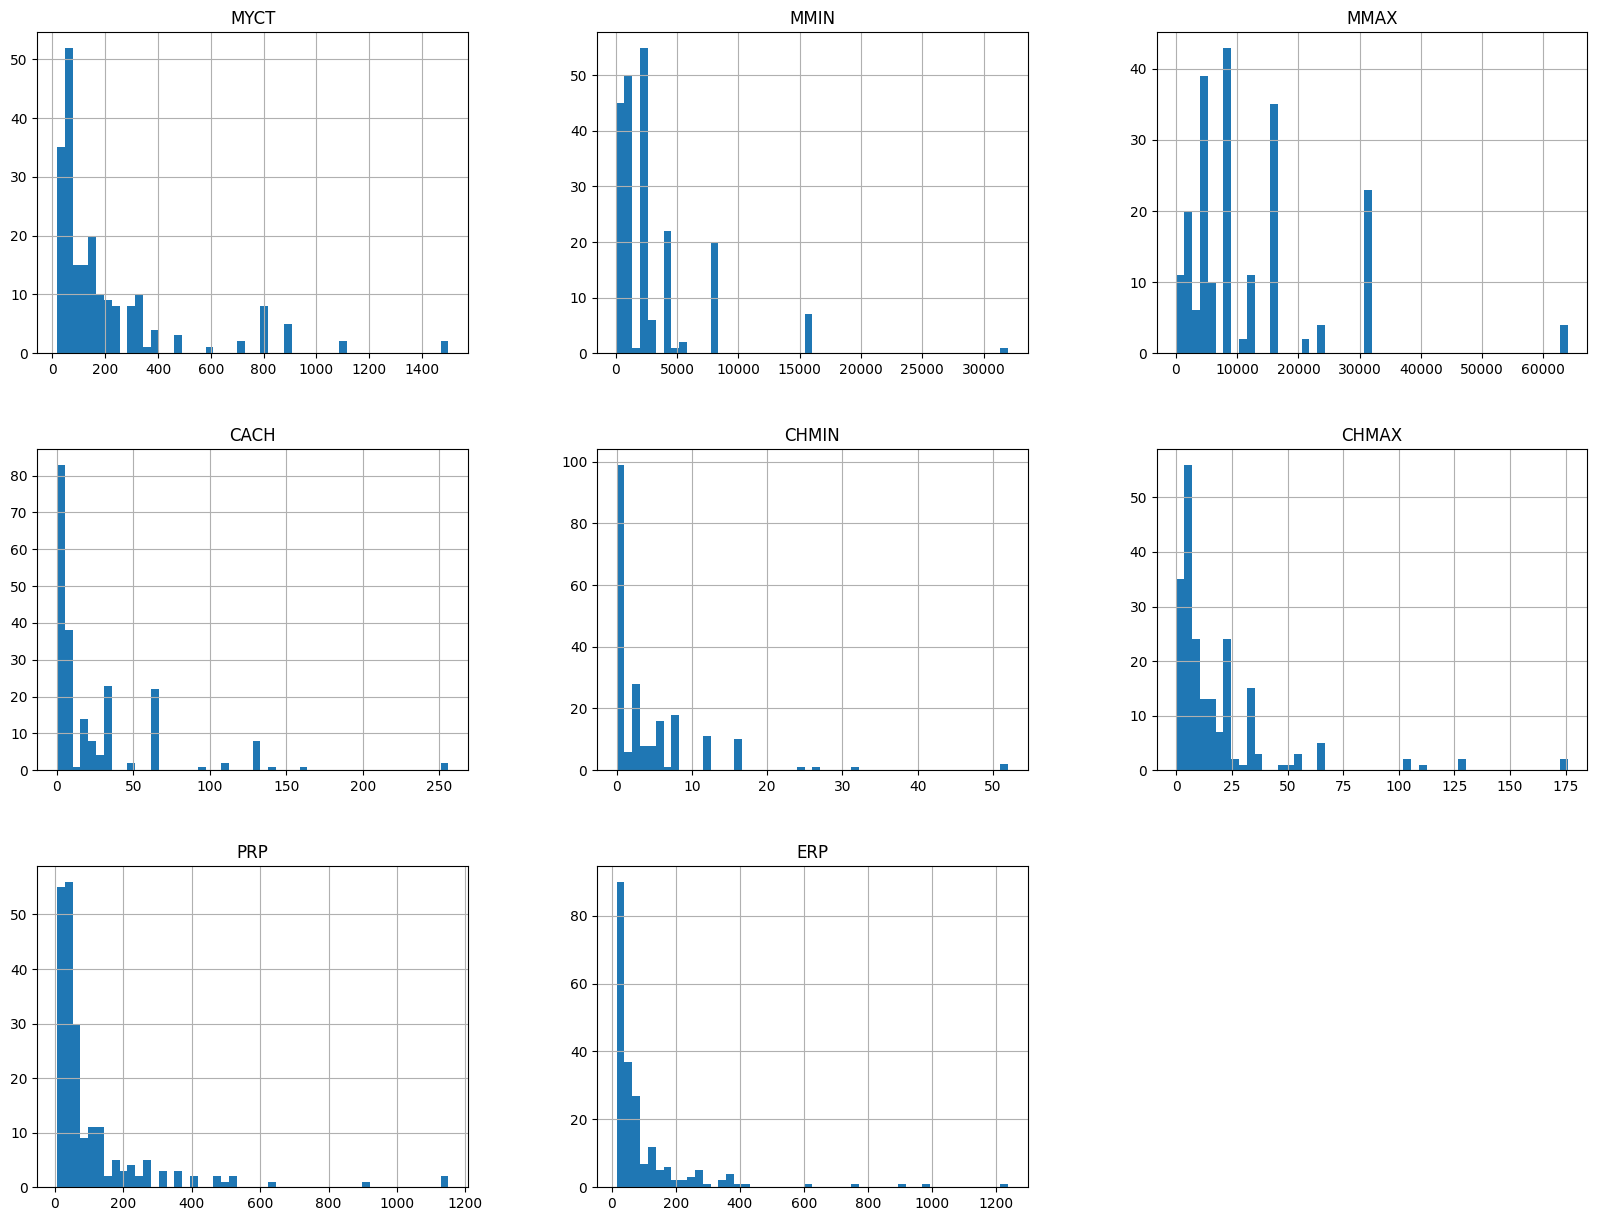

PRP      1.000000
ERP      0.966472
MMAX     0.863004
MMIN     0.794931
CACH     0.662641
CHMIN    0.608903
CHMAX    0.605209
MYCT    -0.307099
Name: PRP, dtype: float64


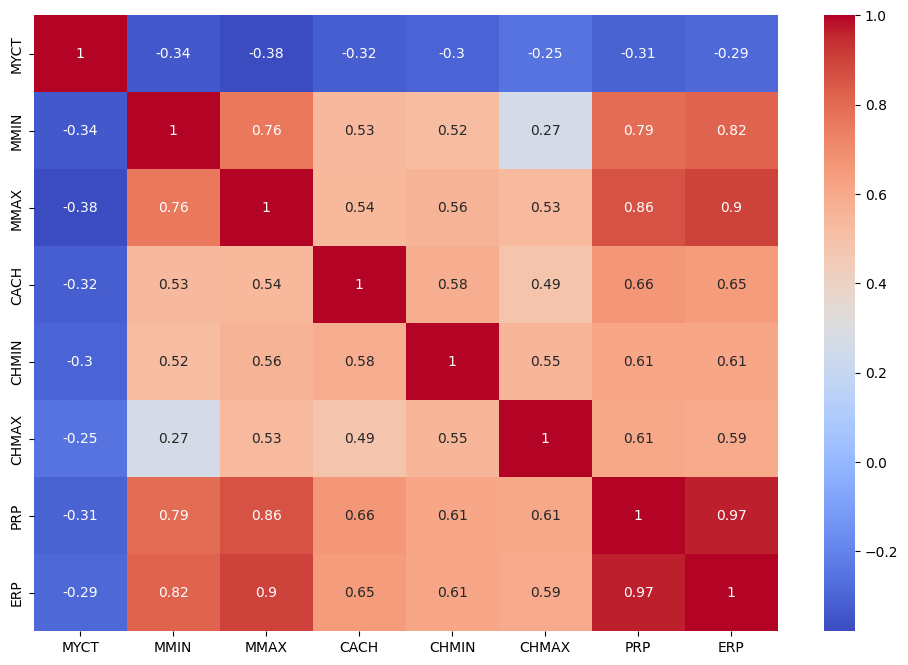

Cross-validation R^2 scores: [0.62174085 0.67381289 0.86922791 0.67984174 0.00517244]
Mean cross-validation R^2 score: 0.5699591665649525
Train MSE: 3773.086164888668
Train MAE: 38.281061065375226
Train R^2: 0.8471450160943813
Test MSE: 2560.765496466849
Test MAE: 33.43438931096331
Test R^2: 0.9124402314278035
Best parameters: {'model__alpha': 10.0, 'poly__degree': 1}
Best cross-validation R^2: 0.6116380620141937
Test MSE (Best): 2817.111802928033
Test MAE (Best): 33.664544195170166
Test R^2 (Best): 0.9036750308270272


In [4]:
# 3차 프로그래밍 과제

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('machine.data_update.csv', header=None)
data.columns = ["VendorName", "ModelName", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]

# Convert relevant columns to numeric types
numeric_columns = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Data exploration
print(data.head())
print(data.describe())
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Check for missing values again to ensure they are handled
print(data.isnull().sum())

# Visualizing the data
data[numeric_columns].hist(bins=50, figsize=(20, 15))
plt.show()

# Correlation matrix for numeric columns
corr_matrix = data[numeric_columns].corr()
print(corr_matrix["PRP"].sort_values(ascending=False))

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Select features
features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
X = data[features]
y = data["PRP"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Cross-validation
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validation R^2 scores:", cross_val_scores)
print("Mean cross-validation R^2 score:", cross_val_scores.mean())

# Training data performance
y_train_pred = model.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Train MSE: {mse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train R^2: {r2_train}")

# Test data performance
y_test_pred = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test R^2: {r2_test}")

# Pipeline with Polynomial Features and Ridge Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'model__alpha': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation R^2: {grid_search.best_score_}")

# Evaluate the best model
best_model = grid_search.best_estimator_

# Test data performance
y_test_pred_best = best_model.predict(X_test)
mse_test_best = mean_squared_error(y_test, y_test_pred_best)
mae_test_best = mean_absolute_error(y_test, y_test_pred_best)
r2_test_best = r2_score(y_test, y_test_pred_best)

print(f"Test MSE (Best): {mse_test_best}")
print(f"Test MAE (Best): {mae_test_best}")
print(f"Test R^2 (Best): {r2_test_best}")
